# Assignment 3

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
from fastai.vision import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/CMPE 258/Assignment 3/train_v2.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dropout, Flatten, Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.backend import clear_session
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.applications import ResNet50, VGG16
import tensorflow as tf

Using TensorFlow backend.


In [6]:
import math
import matplotlib
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import zipfile

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from keras.preprocessing import image
import urllib.request
from keras.preprocessing.image import *
import keras
from keras.layers import *

In [0]:
x_train = []
x_test = []
y_train = []

In [0]:
def flatten(l):
    result = []
    for sublist in l:     
        for item in sublist: 
            result.append(item)
    return result

In [0]:
labels = list(set(flatten([l.split(' ') for l in df_train['tags'].values])))

In [14]:
print(labels)

['cultivation', 'bare_ground', 'water', 'habitation', 'clear', 'conventional_mine', 'partly_cloudy', 'agriculture', 'slash_burn', 'road', 'cloudy', 'artisinal_mine', 'primary', 'blooming', 'selective_logging', 'blow_down', 'haze']


In [0]:
lab_m = {l: i for i, l in enumerate(labels)}
inv_lab_m = {i: l for l, i in lab_m.items()}

In [16]:
lab_m

{'agriculture': 7,
 'artisinal_mine': 11,
 'bare_ground': 1,
 'blooming': 13,
 'blow_down': 15,
 'clear': 4,
 'cloudy': 10,
 'conventional_mine': 5,
 'cultivation': 0,
 'habitation': 3,
 'haze': 16,
 'partly_cloudy': 6,
 'primary': 12,
 'road': 9,
 'selective_logging': 14,
 'slash_burn': 8,
 'water': 2}

In [17]:
inv_lab_m

{0: 'cultivation',
 1: 'bare_ground',
 2: 'water',
 3: 'habitation',
 4: 'clear',
 5: 'conventional_mine',
 6: 'partly_cloudy',
 7: 'agriculture',
 8: 'slash_burn',
 9: 'road',
 10: 'cloudy',
 11: 'artisinal_mine',
 12: 'primary',
 13: 'blooming',
 14: 'selective_logging',
 15: 'blow_down',
 16: 'haze'}

In [0]:
from tqdm import tqdm

In [0]:
splitter = 30000
x_train, x_valid, y_train, y_valid = x_train[:splitter], x_train[splitter:], y_train[:splitter], y_train[splitter:]

###Distribution of Labels

conventional_mine is tagged least no of times: 99
primary is tagged max no of times: 37512


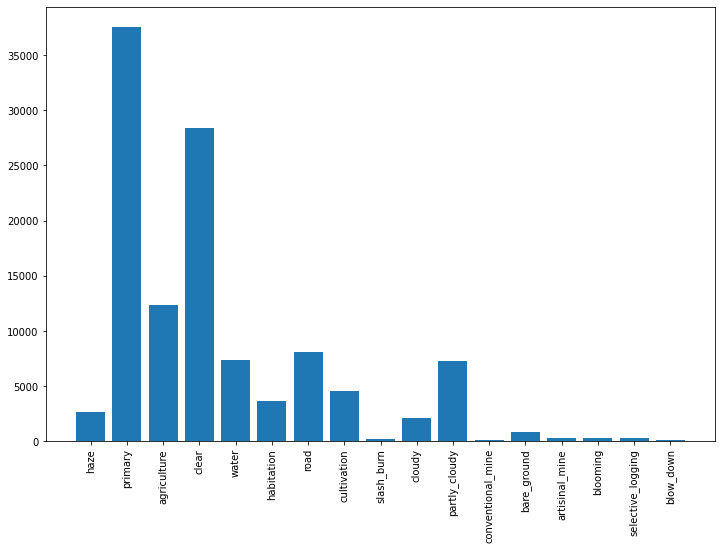

In [20]:
plt.figure(figsize=(12, 8))

labels_count = {}

for tag in df_train['tags'].values:
    labels_in_tag = tag.split(' ')
    for label in labels_in_tag:
        if label in labels_count:
            labels_count[label] += 1
        else:
            labels_count[label] = 0
            
min_label = min(labels_count, key=labels_count.get)
max_label = max(labels_count, key=labels_count.get)

print(min_label+" is tagged least no of times: "+str(labels_count[min_label]))
print(max_label+" is tagged max no of times: "+str(labels_count[max_label]))
            
plt.bar(range(len(labels_count)), list(labels_count.values()), align='center')
plt.xticks(range(len(labels_count)), list(labels_count.keys()), rotation=90)

plt.show()

In [0]:

def crate_model():
  model = keras.models.Sequential()
  model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=17, activation='sigmoid'))
  return model

In [0]:
model=crate_model()

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [25]:
!pip install -U tensorboard

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.6/dist-packages (2.2.1)


In [0]:
from keras.callbacks import TensorBoard

import tensorflow as tf
import datetime

!rm -rf ./log

In [0]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)